In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import math
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head(20)

age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
1    18    male  33.77         1     no  southeast   1725.55230
2    28    male  33.00         3     no  southeast   4449.46200
3    33    male  22.71         0     no  northwest  21984.47061
4    32    male  28.88         0     no  northwest   3866.85520
5    31  female  25.74         0     no  southeast   3756.62160
6    46  female  33.44         1     no  southeast   8240.58960
7    37  female  27.74         3     no  northwest   7281.50560
8    37    male  29.83         2     no  northeast   6406.41070
9    60  female  25.84         0     no  northwest  28923.13692
10   25    male  26.22         0     no  northeast   2721.32080
11   62  female  26.29         0    yes  southeast  27808.72510
12   23    male  34.40         0     no  southwest   1826.84300
13   56  female  39.82         0     no  southeast  11090.71780
14   27    male  42.13         0    yes  southeast  39611.75770
15   19    male  24.60         1     no  southwest   1837.23700
16   52  female  30.78         1     no  northeast  10797.33620
17   23    male  23.85         0     no  northeast   2395.17155
18   56    male  40.30         0     no  southwest  10602.38500
19   30    male  35.30         0    yes  southwest  36837.46700

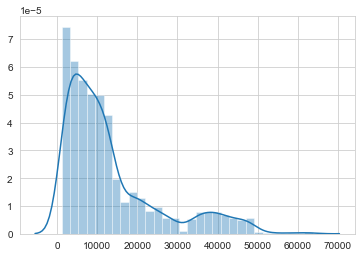

In [97]:
c = df['charges'].values
sns.distplot(c)

In [ ]:
# ax = sns.lmplot(x = "age", y = "charges", data = df, height = 10, aspect = 1, hue='sex')

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
total_charges = df['charges'].sum()
total_charges

17755824.990759

In [7]:
#df.groupby('Item_Type').agg(np.sum)[['Item_Outlet_Sales']].round(2)
df.groupby(['sex','smoker']).agg(np.sum)[['charges']].round(2)

charges
sex    smoker            
female no      4792976.62
       yes     3528084.57
male   no      4181084.85
       yes     5253678.95

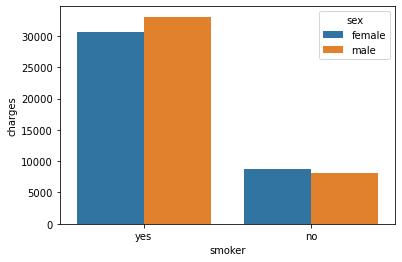

In [8]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='sex', ci=False)

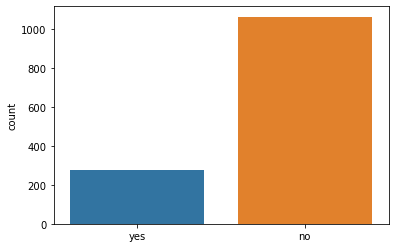

In [9]:
sv = df['smoker'].values
sns.countplot(sv)

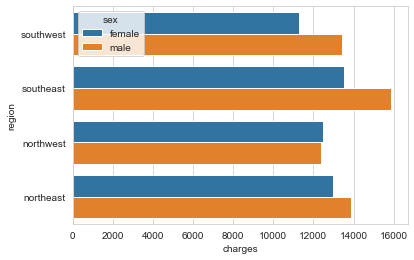

In [94]:
ax = sns.barplot(x='charges', y='region', data=df,hue='sex', ci=False)

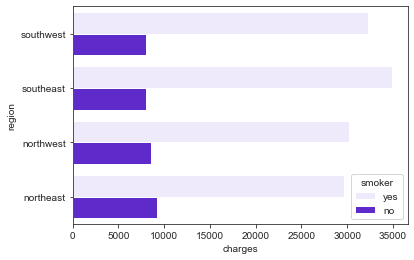

In [100]:
# sns.set_style('ticks')
# ax = sns.barplot(x = 'charges', y = 'region', hue = 'smoker', color = '#560FE5', data = df, orient = 'h', ci = False)

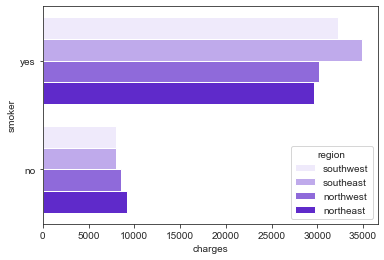

In [104]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'smoker', hue = 'region', color = '#560FE5', data = df, orient = 'h', ci = False)

In [10]:
mask_nonsmokers = df['smoker']=='no'

In [11]:
non_smokers = df[mask_nonsmokers]

In [12]:
non_smokers

age     sex    bmi  children smoker     region      charges
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[1064 rows x 7 columns]

In [13]:
non_smokers.describe()

age          bmi     children       charges
count  1064.000000  1064.000000  1064.000000   1064.000000
mean     39.385338    30.653017     1.090226   8434.268298
std      14.083410     6.042879     1.218136   5993.781819
min      18.000000    15.960000     0.000000   1121.873900
25%      26.750000    26.320000     0.000000   3986.438700
50%      40.000000    30.355000     1.000000   7345.405300
75%      52.000000    34.430000     2.000000  11362.887050
max      64.000000    53.130000     5.000000  36910.608030

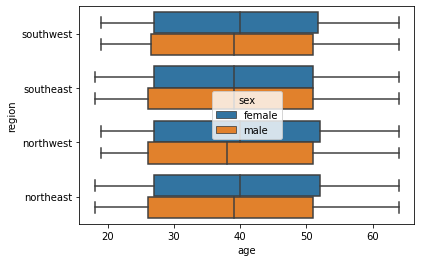

In [14]:
sns.boxplot( 'age', 'region', data=df, hue='sex')

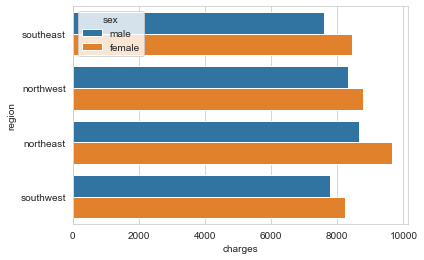

In [91]:
ax = sns.barplot(x='charges', y='region', data=non_smokers,hue='sex', ci=False)

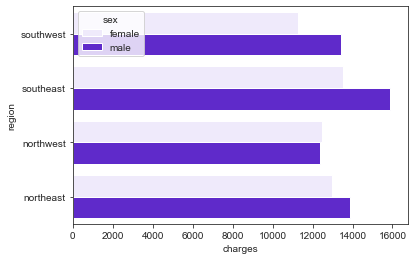

In [105]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'region', hue = 'sex', color = '#560FE5', data = df, orient = 'h', ci = False)

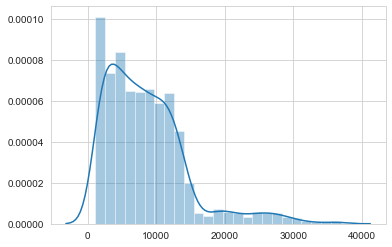

In [98]:
cns = non_smokers['charges'].values
sns.distplot(cns)

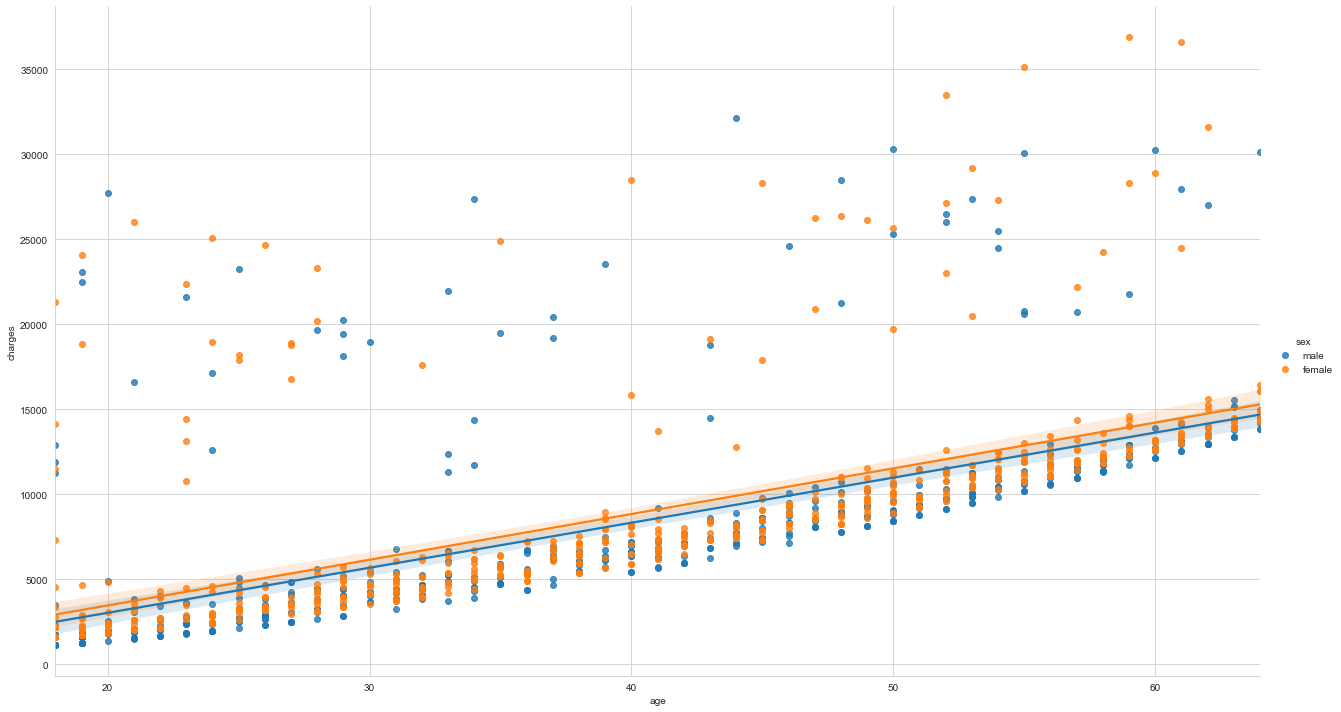

In [99]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smokers, height = 10, aspect = 16/9, hue='sex')

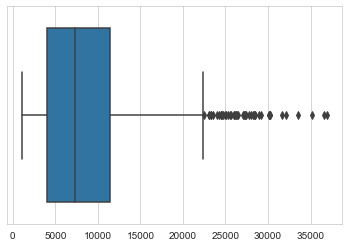

In [16]:
sns.set_style('whitegrid')
x = non_smokers['charges'].values
ax = sns.boxplot(x)

In [17]:
corr_non_smokers = non_smokers[['age', 'children', 'bmi','charges']].corr()
corr_non_smokers

age  children       bmi   charges
age       1.000000  0.033395  0.122635  0.627947
children  0.033395  1.000000  0.019212  0.138929
bmi       0.122635  0.019212  1.000000  0.084045
charges   0.627947  0.138929  0.084045  1.000000

In [18]:
mask_nsw = non_smokers['sex']=='female'

In [19]:
women_nonsmk = non_smokers[mask_nsw]
women_nonsmk

age     sex    bmi  children smoker     region      charges
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
13     56  female  39.82         0     no  southeast  11090.71780
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[547 rows x 7 columns]

In [20]:
women_nonsmk.describe()

age         bmi    children      charges
count  547.000000  547.000000  547.000000    547.00000
mean    39.691042   30.540750    1.087751   8762.29730
std     14.025538    5.901675    1.204226   6060.77597
min     18.000000   16.820000    0.000000   1607.51010
25%     27.000000   26.360000    0.000000   4265.59910
50%     40.000000   30.210000    1.000000   7639.41745
75%     52.000000   34.310000    2.000000  11786.16660
max     64.000000   48.070000    5.000000  36910.60803

In [21]:
corr_women_nonsmk = women_nonsmk[['age', 'children', 'bmi','charges']].corr()
corr_women_nonsmk

age  children       bmi   charges
age       1.000000  0.079141  0.089148  0.621786
children  0.079141  1.000000  0.051114  0.176355
bmi       0.089148  0.051114  1.000000  0.075089
charges   0.621786  0.176355  0.075089  1.000000

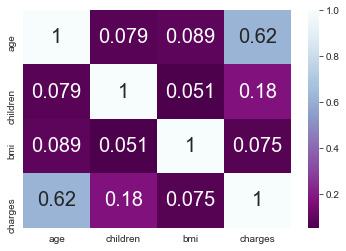

In [22]:
hm_women_nonsmk = sns.heatmap(corr_women_nonsmk, annot = True, annot_kws = {'size':'20'},cmap = 'BuPu_r')

In [23]:
mask_nsm = non_smokers['sex']=='male'

In [24]:
men_nonsmk = non_smokers[mask_nsm]
men_nonsmk

age   sex    bmi  children smoker     region      charges
1      18  male  33.77         1     no  southeast   1725.55230
2      28  male  33.00         3     no  southeast   4449.46200
3      33  male  22.71         0     no  northwest  21984.47061
4      32  male  28.88         0     no  northwest   3866.85520
8      37  male  29.83         2     no  northeast   6406.41070
...   ...   ...    ...       ...    ...        ...          ...
1324   31  male  25.94         1     no  northwest   4239.89265
1325   61  male  33.54         0     no  northeast  13143.33665
1327   51  male  30.03         1     no  southeast   9377.90470
1329   52  male  38.60         2     no  southwest  10325.20600
1333   50  male  30.97         3     no  northwest  10600.54830

[517 rows x 7 columns]

In [25]:
men_nonsmk.describe()

age         bmi    children       charges
count  517.000000  517.000000  517.000000    517.000000
mean    39.061896   30.771799    1.092843   8087.204731
std     14.150768    6.192280    1.233844   5908.108989
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.220000    0.000000   3659.346000
50%     39.000000   30.500000    1.000000   6985.506950
75%     51.000000   34.430000    2.000000  10959.330000
max     64.000000   53.130000    5.000000  32108.662820

In [26]:
corr_men_nonsmk = men_nonsmk[['age', 'children', 'bmi','charges']].corr()
corr_men_nonsmk

age  children       bmi   charges
age       1.000000 -0.013316  0.157116  0.634549
children -0.013316  1.000000 -0.012258  0.100066
bmi       0.157116 -0.012258  1.000000  0.095926
charges   0.634549  0.100066  0.095926  1.000000

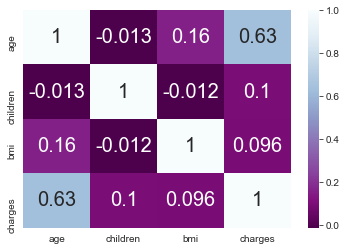

In [27]:
hm_men_nonsmk = sns.heatmap(corr_men_nonsmk, annot = True, annot_kws = {'size':'20'},cmap = 'BuPu_r')

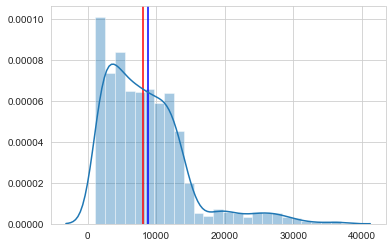

In [28]:
mean=men_nonsmk['charges'].mean()
mean2=women_nonsmk['charges'].mean()
#print(f"min={np.min(r)}\n max={np.max(r)}\n median={np.median(r)}\n mean={np.mean(r)}\n std={np.std(r, ddof=1)}\n" )
plt.axvline(mean,0, 1, color = 'red')
plt.axvline(mean2,0, 1, color='blue')
ax = sns.distplot(x)

In [29]:
stats.ttest_ind( men_nonsmk['charges'], women_nonsmk['charges'], equal_var=False)

Ttest_indResult(statistic=-1.839622216350089, pvalue=0.06610296328675346)

In [30]:
non_smokers.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
# model non-smokers to perdict charges
formula = 'charges ~ age + I(age*2) + children + bmi + C(region)'

In [32]:
train, test = statsmodels_train_test_split(non_smokers)

In [33]:
model = smf.ols(formula = formula, data=non_smokers).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     125.2
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          1.48e-119
Time:                        15:48:18   Log-Likelihood:                -10479.
No. Observations:                1064   AIC:                         2.097e+04
Df Residuals:                    1057   BIC:                         2.101e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2450.0617    832.165     -2.944      0.003   -4082.945    -817.178
C(region)[T.northwest]  -552.2485    401.724     -1.375      0.170   -1340.515     236.018
C(region)[T.southeast]  -989.6312    412.349     -2.400      0.017   -1798.747    -180.516
C(region)[T.southwest] -1385.9236    402.721     -3.441      0.001   -2176.146    -595.701
age                       52.9895      2.023     26.200      0.000      49.021      56.958
I(age * 2)               105.9791      4.045     26.200      0.000      98.042     113.916
children                 586.9031    115.844      5.066      0.000     359.593     814.213
bmi                       17.9330     24.553      0.730      0.465     -30.246      66.112
==============================================================================
Omnibus:                      709.362   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5685.282
Skew:                           3.183   Prob(JB):                         0.00
Kurtosis:                      12.365   Cond. No.                     1.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
model.params

Intercept                -2450.061689
C(region)[T.northwest]    -552.248539
C(region)[T.southeast]    -989.631190
C(region)[T.southwest]   -1385.923585
age                         52.989550
I(age * 2)                 105.979100
children                   586.903078
bmi                         17.932971
dtype: float64

In [35]:
y_pred_test = model.predict(test)
y_pred_test

1080     2893.752863
1144    11164.443292
432      7774.217102
145      6700.838333
553     12517.792043
            ...     
1182     3331.077468
988      7180.077206
191      6171.977527
1028    11037.875053
372      9859.304161
Length: 266, dtype: float64

In [36]:
r2_score(test['charges'], y_pred_test)

0.5134010001428035

In [37]:
mean_squared_error(test['charges'], y_pred_test)

16228008.28801998

In [38]:
# model non-smokers

In [39]:
train2, test2 = statsmodels_train_test_split(non_smokers)

In [40]:
model2 = smf.ols(formula = 'age ~ charges + children + bmi + C(region)', data=non_smokers).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          5.90e-116
Time:                        15:48:18   Log-Likelihood:                -4046.3
No. Observations:                1064   AIC:                             8107.
Df Residuals:                    1057   BIC:                             8141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.6222      1.864     11.601      0.000      17.965      25.279
C(region)[T.northwest]     0.6054      0.952      0.636      0.525      -1.263       2.474
C(region)[T.southeast]     0.1355      0.979      0.138      0.890      -1.786       2.057
C(region)[T.southwest]     2.2038      0.957      2.304      0.021       0.327       4.081
charges                    0.0015   5.67e-05     26.200      0.000       0.001       0.002
children                  -0.6623      0.277     -2.392      0.017      -1.206      -0.119
bmi                        0.1700      0.058      2.935      0.003       0.056       0.284
==============================================================================
Omnibus:                      144.669   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.163
Skew:                          -0.933   Prob(JB):                     9.44e-49
Kurtosis:                       4.226   Cond. No.                     5.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model2.params

Intercept                 21.622204
C(region)[T.northwest]     0.605426
C(region)[T.southeast]     0.135458
C(region)[T.southwest]     2.203828
charges                    0.001486
children                  -0.662254
bmi                        0.170029
dtype: float64

In [42]:
y_pred_test2 = model2.predict(test2)
y_pred_test2

440     34.163101
950     41.881647
640     37.630185
525     44.581724
887     35.166480
          ...    
1103    44.778428
305     55.465414
333     43.841981
1165    33.833980
127     44.502276
Length: 266, dtype: float64

In [43]:
mean_squared_error(test2['charges'], y_pred_test2)

98435264.39593987

In [44]:
df2 = pd.read_csv('insurance.csv')

In [45]:
mask_nosmk = df2['smoker']=='no'

In [46]:
df2 = df2[mask_nosmk]

In [47]:
# #version 3
# def statsmodels_train_test_split2(df, stratify=None, **kwargs):

#     if stratify is None:
#         y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
#         X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
#     else:
#         y, X = stratify, df.drop(columns = stratify.Name)
#         X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
#     return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [48]:
# df2.head()

In [49]:
# # We need to use a package from sklearn
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder().fit_transform(df2['region'])
# le

In [50]:
# df2.loc[:,'region_code'] = le
# df2.head()

In [51]:
df3 = pd.read_csv('insurance.csv')

In [52]:
smk_mask = df3['smoker']=='no'

In [53]:
df3 = df3[smk_mask]

In [54]:
df3.head()

age     sex    bmi  children smoker     region      charges
1   18    male  33.77         1     no  southeast   1725.55230
2   28    male  33.00         3     no  southeast   4449.46200
3   33    male  22.71         0     no  northwest  21984.47061
4   32    male  28.88         0     no  northwest   3866.85520
5   31  female  25.74         0     no  southeast   3756.62160

In [55]:
df3_non_smokers = df3.drop(['smoker'], axis=1)

In [56]:
df3_non_smokers.head()

age     sex    bmi  children     region      charges
1   18    male  33.77         1  southeast   1725.55230
2   28    male  33.00         3  southeast   4449.46200
3   33    male  22.71         0  northwest  21984.47061
4   32    male  28.88         0  northwest   3866.85520
5   31  female  25.74         0  southeast   3756.62160

In [57]:
df3_non_smokers['region'].value_counts()

southeast    273
southwest    267
northwest    267
northeast    257
Name: region, dtype: int64

In [58]:
#MULTINOMIAL LOGISTIC REGRESSION USING SKLEARN

In [59]:
df3_non_smokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   region    1064 non-null   object 
 5   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 58.2+ KB


In [60]:
# this is equivalent to 
#formula = 'species ~ C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g  + C(sex)'

# y2, X2 = df3_non_smokers, df3_non_smokers.drop(columns='region')
# X2 = pd.get_dummies(X2, drop_first=True)

In [61]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, random_state=42)

In [62]:
# log_model = LogisticRegression(random_state=42, n_jobs=-1).fit(X2_train, y2_train)

In [63]:

# y2_pred_test = log_model.predict(X2_test)

In [64]:
# confusion_matrix(y2_test, y2_pred_test)

In [65]:
#Models with outliers removed for (non-smokers)

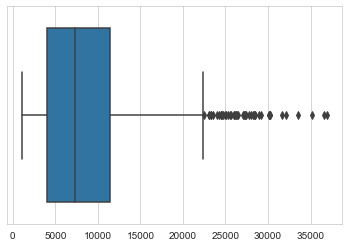

In [66]:
# use the boxplot to determine cutoff of 22,500 for charges
sns.set_style('whitegrid')
x = non_smokers['charges'].values
ax = sns.boxplot(x)

In [67]:
non_smokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [68]:
non_smokers['smoker'].value_counts()

no    1064
Name: smoker, dtype: int64

In [69]:
mask_out = non_smokers['charges']<22500

In [70]:
non_smokers_noout = non_smokers[mask_out]
non_smokers_noout

age     sex    bmi  children smoker     region      charges
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[1019 rows x 7 columns]

In [71]:
non_smokers_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1019 non-null   int64  
 1   sex       1019 non-null   object 
 2   bmi       1019 non-null   float64
 3   children  1019 non-null   int64  
 4   smoker    1019 non-null   object 
 5   region    1019 non-null   object 
 6   charges   1019 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 63.7+ KB


In [72]:
non_smokers_noout.describe()

age          bmi    children       charges
count  1019.000000  1019.000000  1019.00000   1019.000000
mean     39.052012    30.641933     1.07949   7593.127803
std      14.028957     6.081014     1.22216   4500.396589
min      18.000000    15.960000     0.00000   1121.873900
25%      26.000000    26.320000     0.00000   3864.032425
50%      39.000000    30.310000     1.00000   7147.105000
75%      51.000000    34.400000     2.00000  10926.391100
max      64.000000    53.130000     5.00000  22493.659640

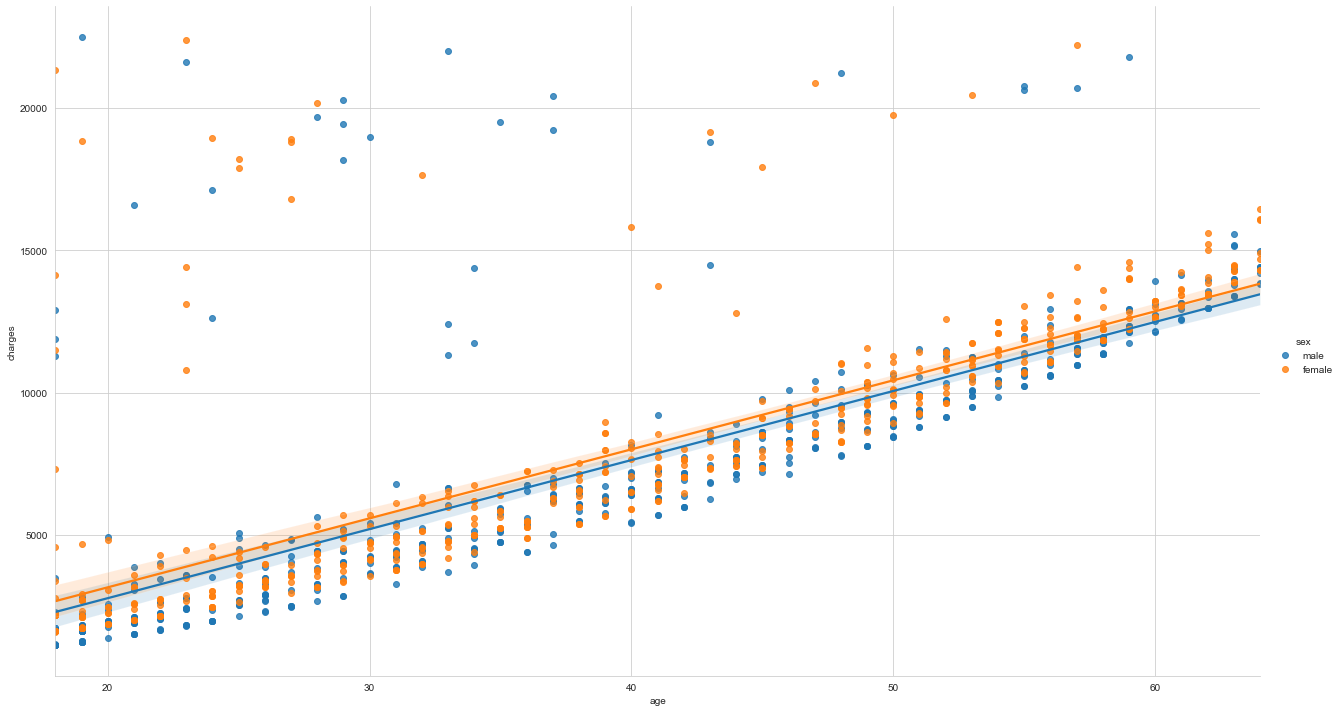

In [73]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smokers_noout, height = 10, aspect = 16/9, hue='sex')

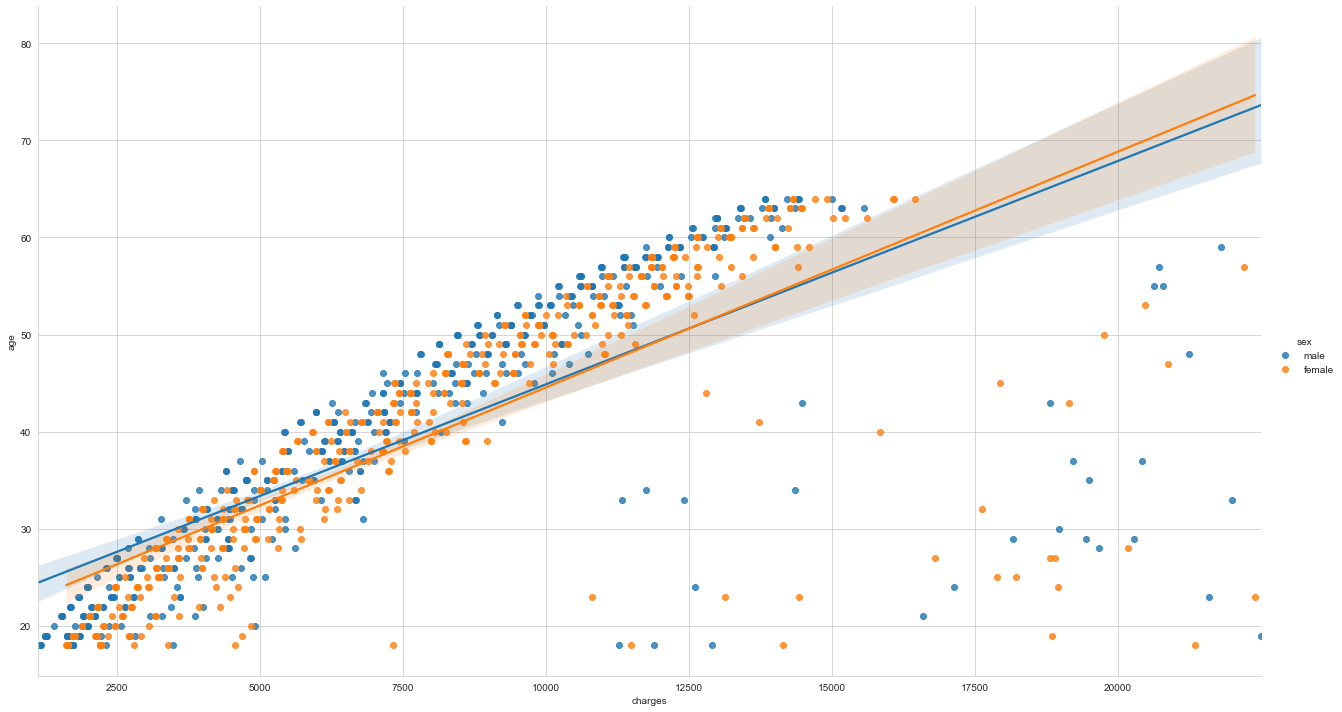

In [74]:
ax = sns.lmplot(x = "charges", y = "age", data = non_smokers_noout, height = 10, aspect = 16/9, hue='sex')

In [ ]:
#ax = sns.barplot(x='charges', y='region', data=df,hue='sex', ci=False)

In [75]:
males = non_smokers_noout['sex']=='male'

In [76]:
df_males_ns = non_smokers_noout[males]

In [77]:
df_males_ns['charges'].mean()

7324.077628390342

In [78]:
females = non_smokers_noout['sex']=='female'

In [79]:
df_females_ns = non_smokers_noout[females]

In [80]:
df_females_ns['charges'].mean()

7849.292432354407

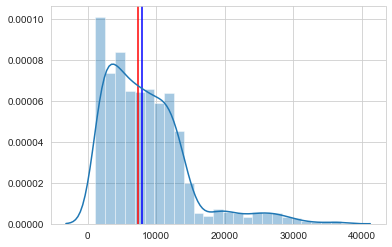

In [81]:
mean=df_males_ns['charges'].mean()
mean2=df_females_ns['charges'].mean()
#print(f"min={np.min(r)}\n max={np.max(r)}\n median={np.median(r)}\n mean={np.mean(r)}\n std={np.std(r, ddof=1)}\n" )
plt.axvline(mean,0, 1, color = 'red')
plt.axvline(mean2,0, 1, color='blue')
ax = sns.distplot(x)

In [82]:
stats.ttest_ind( df_males_ns['charges'], df_females_ns['charges'], equal_var=False)

Ttest_indResult(statistic=-1.862722003959486, pvalue=0.06279166812515086)

In [83]:
non_smokers_noout.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [84]:
# model  non smoking women and men without outliers
#formula = 'charges ~ age + children + sex + bmi + C(region)'

In [85]:
train3, test3 = statsmodels_train_test_split(non_smokers_noout)

In [86]:
model3 = smf.ols(formula = 'charges ~ age + children + sex + bmi + C(region)', data=non_smokers_noout).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          1.38e-193
Time:                        15:48:22   Log-Likelihood:                -9556.4
No. Observations:                1019   AIC:                         1.913e+04
Df Residuals:                    1011   BIC:                         1.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2093.9175    536.399     -3.904      0.000   -3146.501   -1041.335
sex[T.male]             -389.9054    180.200     -2.164      0.031    -743.514     -36.297
C(region)[T.northwest]  -455.1241    257.689     -1.766      0.078    -960.790      50.542
C(region)[T.southeast]  -835.5853    264.924     -3.154      0.002   -1355.449    -315.722
C(region)[T.southwest]  -941.5011    257.197     -3.661      0.000   -1446.202    -436.801
age                      240.1511      6.492     36.990      0.000     227.411     252.891
children                 448.1114     73.765      6.075      0.000     303.361     592.862
bmi                       19.0340     15.649      1.216      0.224     -11.674      49.742
==============================================================================
Omnibus:                      895.273   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17267.638
Skew:                           4.218   Prob(JB):                         0.00
Kurtosis:                      21.317   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
y_pred_test3 = model.predict(test3)
y_pred_test3

51       4338.484466
590     12051.040325
625      5147.969725
1130    10255.844736
1136     8856.943033
            ...     
726      8956.926262
1220     6478.902570
582      8881.770353
1023     2334.466560
368     10403.410612
Length: 255, dtype: float64

In [88]:
r2_score(test3['charges'], y_pred_test3)

0.6466128375977416

In [89]:
mean_squared_error(test3['charges'], y_pred_test3)

7013280.8889162075